<a href="https://colab.research.google.com/github/Paengpeng/229351-StatisticalLearning/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-21 14:11:44--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-21 14:11:44 (10.4 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-21 14:11:44--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29.10K  --.-KB/s    in

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [14]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data

# 2. หา covariance matrix

# 3. Decompose the covariance matrix UDU^T

# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด

# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U

# Result: a (50,2) matrix


In [17]:
import numpy as np
Σ = np.random.rand(50, 85)
np.mean(Σ, axis=0)
M = Σ - np.mean(Σ, axis=0)
A = np.cov(M, rowvar=False)
dpA = np.linalg.eigh(A)
D = dpA[0]
U = dpA[1]

l_2 = D[-1] #eigenvalue ที่มีค่าสูงที่สุด
l_3 = D[-2] #eigenvalue ที่มีค่ารองลงมา

U_23 = U[:,-2:]
M2 = U @ U_23
print(M2)

[[-0.18562901  0.11576472]
 [ 0.108128    0.0187469 ]
 [ 0.02110762  0.08646119]
 [ 0.01525217  0.0468534 ]
 [-0.13217139 -0.02325203]
 [ 0.08681101 -0.04624989]
 [-0.02260615 -0.03694042]
 [-0.01261499  0.05174287]
 [-0.04699739  0.08302934]
 [ 0.11463483  0.08620496]
 [ 0.03817759  0.14546221]
 [ 0.02612797 -0.01334632]
 [-0.07511629 -0.23423252]
 [-0.13585068 -0.13753813]
 [ 0.06930646 -0.01157115]
 [ 0.18938195  0.06803936]
 [ 0.199137    0.00780708]
 [-0.06322666 -0.08657931]
 [ 0.04331246 -0.06102719]
 [ 0.13094638  0.15128642]
 [ 0.20444455 -0.04796205]
 [ 0.08752543 -0.17322694]
 [-0.10198106 -0.17521096]
 [-0.07632686 -0.06643855]
 [ 0.15325459 -0.00813123]
 [-0.00268488  0.06857283]
 [-0.07509211 -0.06113277]
 [ 0.03872934  0.08943196]
 [-0.1392382  -0.06785515]
 [-0.17325961 -0.01778262]
 [ 0.10187471  0.19932221]
 [-0.08228116  0.02435745]
 [ 0.22176221 -0.0443644 ]
 [ 0.23959177 -0.04287724]
 [ 0.08642453 -0.34136693]
 [-0.04938178  0.06446526]
 [ 0.08800099 -0.14795263]
 

#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [18]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
B2 = pca.fit_transform(M)
print(B2)

[[ 0.03139135  0.08612564]
 [ 0.56832176  0.1627713 ]
 [-1.60132536  0.1705072 ]
 [-0.22628152 -0.02806315]
 [ 0.51642294  0.99741014]
 [-0.73261585 -0.87495012]
 [-0.47424593  0.35185582]
 [ 1.1703491  -0.83093142]
 [ 0.41013896  0.43305009]
 [-0.0086304   0.43255459]
 [-0.03571586 -0.60387231]
 [-0.22826965  1.0645756 ]
 [ 0.07898347 -0.06361713]
 [-0.94564765  0.27416636]
 [-0.17555993  0.64179085]
 [ 0.35672053  0.06485636]
 [-0.14306993 -0.67287405]
 [-0.72831443  0.18748494]
 [-0.72043249 -0.84708731]
 [-0.47697518  0.20925208]
 [ 0.47818839 -0.1553138 ]
 [ 1.07045804  0.45687639]
 [-0.41734368 -0.16838116]
 [-0.52253012 -0.1778189 ]
 [-0.7316992   0.01265339]
 [-0.52728391  0.62859896]
 [ 0.06540531 -0.53548811]
 [-0.81336438 -0.9857149 ]
 [ 0.11883428  1.2075669 ]
 [ 0.22303577 -0.2119626 ]
 [-0.7707222   0.60654853]
 [-0.40858045  0.55419009]
 [ 1.12007714  0.21264083]
 [ 1.4612201  -0.13604343]
 [ 0.67539971 -0.79072883]
 [ 0.697649    1.49851603]
 [-0.1239629  -0.44637829]
 

In [ ]:
#TODO (optional): enter code here

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

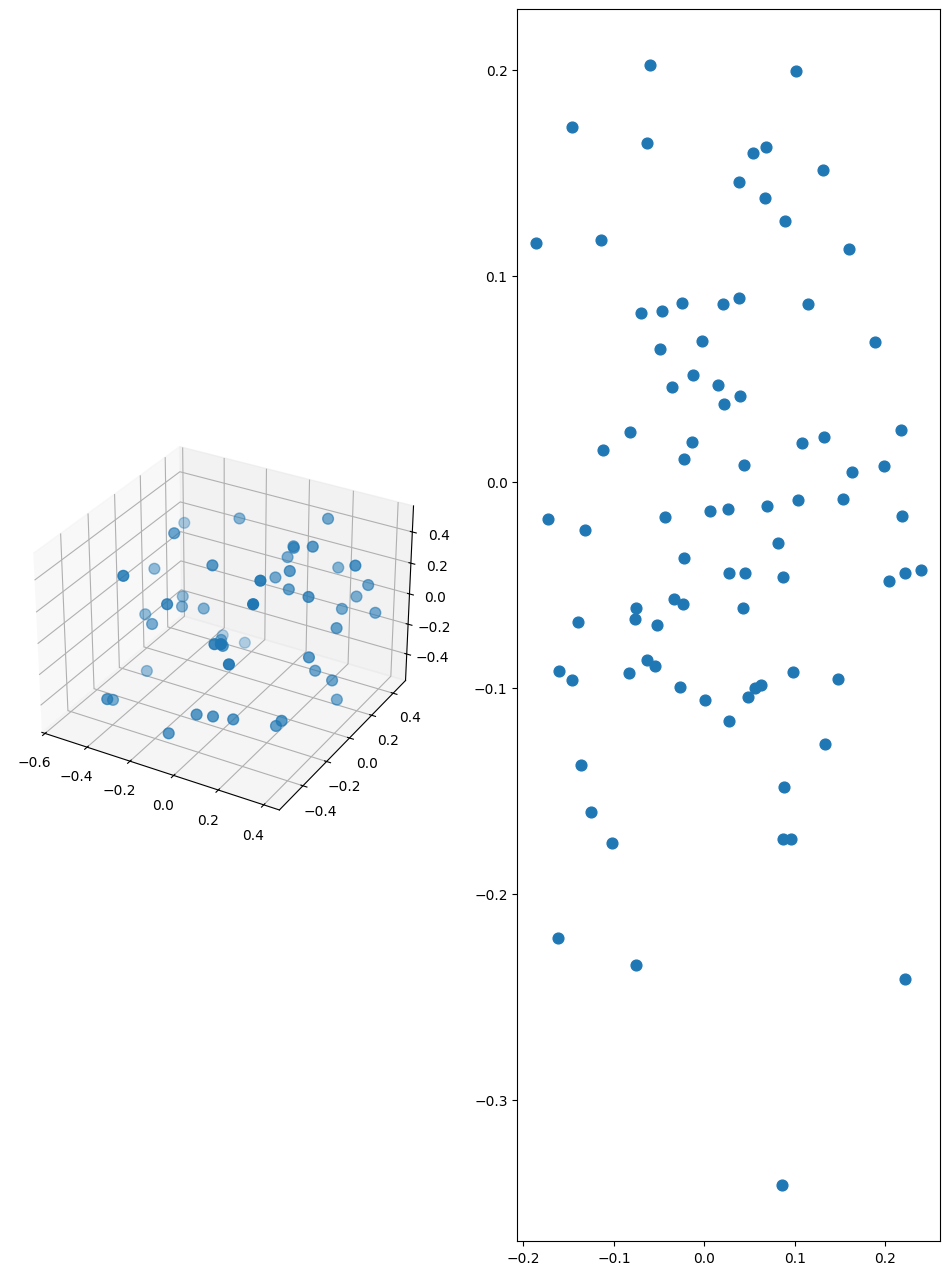

In [24]:
import matplotlib.pyplot as plt

# Plot initialization
fig = plt.figure(figsize=(12,16))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(M[:,0], M[:,1], M[:,2], s=60);

ax2 = fig.add_subplot(122)
ax2.scatter(M2[:,0], M2[:,1], s=60);

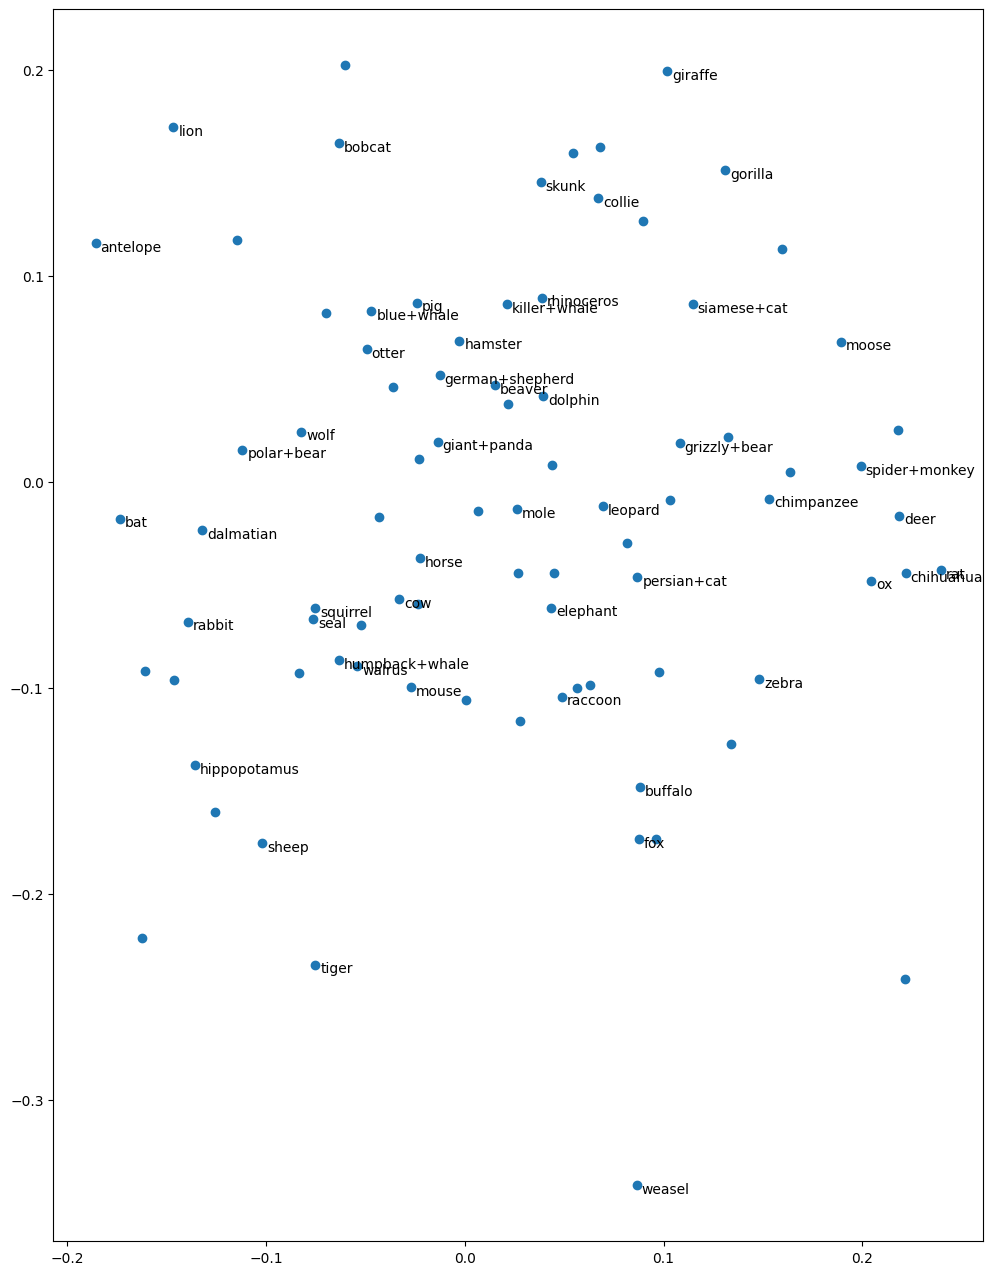

In [23]:
import matplotlib.pyplot as plt
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))

# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
plt.scatter(M2[:, 0], M2[:, 1]) #TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
    plt.annotate(
        text=classes[i, 1],                            # ชื่อสัตว์
        xy=(M2[i, 0], M2[i, 1]),                       # พิกัด x,y
        xytext=(5, -8),                                # ขยับข้อความเล็กน้อย
        textcoords='offset pixels'                    # กำหนดว่าใช้พิกัด offset จากจุด xy
    )

# แสดงกราฟ
plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมซ้ายบน ตัวอย่างเช่น bobcat+lion มีลักษณะที่เหมือนกันคือทั้งสองเป็นสัตว์ในตระกูล Felidae เป็นนักล่า และเป็นสัตว์ที่เลี้ยงลูกด้วยนม
2.กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น Giraffe+gorilla+collie+skunk มีลักษณะที่เหมือนกันคือเป็นสัตว์มีกระดูกสันหลัง เป็นสัตว์เลือดอุ่น ทุกชนิดมีขนปกคลุมร่างกาย และออกลูกเป็นตัว
3.กลุ่มสัตว์ที่มุมซ้ายล่าง ตัวอย่างเช่น hippopotamus+sheep+tiger มีลักษณะที่เหมือนกันคือทั้ง 3 เป็นสัตว์เลี้ยงลูกด้วยนม มีต่อมน้ำนม และออกลูกเป็นตัว อยู่ในกลุ่มสัตว์มีกระดูกสันหลัง และเป็นสัตว์เลือดอุ่น
4.กลุ่มสัตว์ที่มุมขวาล่าง ตัวอย่างเช่น Buffalo+Fox มีลักษณะที่เหมือนกันคือเป็นสัตว์บก อยู่ในกลุ่มสัตว์มีกระดูกสันหลัง สัตว์เลี้ยงลูกด้วยนม และเป็นสัตว์เลี้ยงลูกด้วยนม